In [1]:
import pandas as pd
import numpy as np

# Import plotting libraries
import matplotlib.pyplot as plt

# Model selection libraries
from sklearn.model_selection import train_test_split

# Model Evaluation Libraries
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Import Tensor Flow and keras
import tensorflow as tf
from tensorflow import keras

import tensorflow_hub as hub
import tensorflow_text

import joblib
import pickle

2023-04-01 16:41:29.334589: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Configure Pandas to show all columns / rows
pd.options.display.max_columns = 2000
pd.options.display.max_rows = 2000
# Set column max width larger
pd.set_option('display.max_colwidth', 200)

In [3]:
# Load data from phishing email csv
email_df = pd.read_csv('./data/phishing_all_data_clean_4.csv')

In [4]:
X = email_df.drop(columns=['phishing'])
y = email_df.loc[:, ['phishing']]

In [5]:
X_remainder, X_test, y_remainder, y_test = train_test_split(
    X,
    y,
    stratify=y,
    random_state=1337,
    test_size=0.2,
)
X_remainder.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_remainder.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [6]:
X_train, X_validation, y_train, y_validation = train_test_split(
    X_remainder,
    y_remainder,
    stratify=y_remainder,
    random_state=1337,
    test_size=0.2,
)
X_train.reset_index(drop=True, inplace=True)
X_validation.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_validation.reset_index(drop=True, inplace=True)

In [13]:
loaded_model = keras.models.load_model(
    './models/bert_model_5_relu_sig.h5',
    custom_objects={'KerasLayer':hub.KerasLayer},
    compile=False,
)

In [14]:
loaded_model.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(),
    # Loss function to minimize
    loss=keras.losses.BinaryCrossentropy(),
    # Metric used to evaluate model
    metrics=[keras.metrics.BinaryAccuracy(), keras.metrics.Recall()]
)

In [15]:
y_val_pred = loaded_model.predict(X_validation['content'])

62/62 [==============================] - 273s 4s/step


In [16]:
y_val_bin_pred = np.where(y_val_pred >= 0.5, 1, 0)

In [17]:
accuracy_score(y_validation['phishing'].values, y_val_bin_pred.flatten())

0.9551411290322581

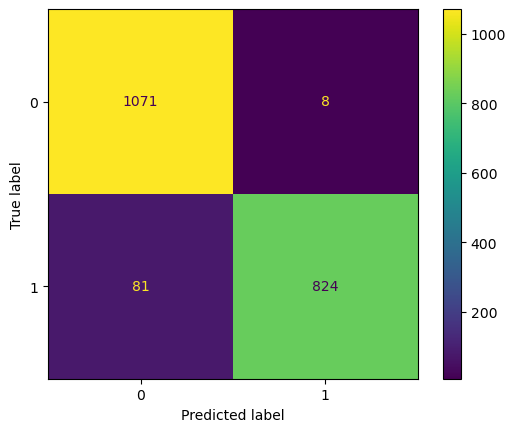

In [18]:
conf_matrix = confusion_matrix(y_validation, y_val_bin_pred)
conf_disp = ConfusionMatrixDisplay(conf_matrix)
conf_disp.plot()
plt.show()

In [19]:
X_validation[(y_validation['phishing'].values == 1) & (y_val_bin_pred.flatten() != y_validation['phishing'].values)]

,content,unsecure_link_count,secure_link_count,numbers_count,word_count
11,FREE MOVIE This advertisement is being sent by a Party where you have to receive or To please follow as provided by the sender at the bottom of this CLAIM YOUR MOVIE CLAIM YOUR MOVIE You are this ...,0,0,7,95
20,Your Full Name Your Full Name Company Name Address Phone Number Mail Cell Phone Cant Fill Out The Form Simply Click On The Image Want to be removed simply reply to this ad,0,0,0,33
35,your reply Best Regard,0,0,0,4
48,INFORMATION NEWSLETTER BY THAT IS ABOVE All are tracked and in our system to protect our against false quick responder ar id Click Here,1,0,3,24
90,Hi Everyone I still have not had any luck with brown clothing for the monkey jeans In case anyone needs adhesive felt at Oak Valley of dark brown adhesive felt They also have fuzzy brown felt for ...,0,0,13,57
102,Thanks and TONY Yahoo Messenger Communicate instantly Ping your today Messenger Now,0,0,0,12
107,Time to receive something nice Tag Tiffany,1,0,2,7
142,This was brought to you by Best Free To see the at the bottom of this You have to remember that in of percent of the on were Beanie And she its on the beginning I think I am most by the fact that ...,2,0,39,189
166,Cheating have been for you in your area away available th Laura away available th away available most works away available most week for side fling All are waiting to speak with you live have are ...,2,0,28,58
188,you believing you are a honest and trustworthy person believe you will not betray the confidence I am willing to repose in you for me to have you even though we not met before You can find the sto...,0,0,64,381


In [35]:
loaded_model.predict([
    '''
    Send the money in gift cards
    '''
])

1/1 [==============================] - 0s 248ms/step


array([[0.09031509]], dtype=float32)